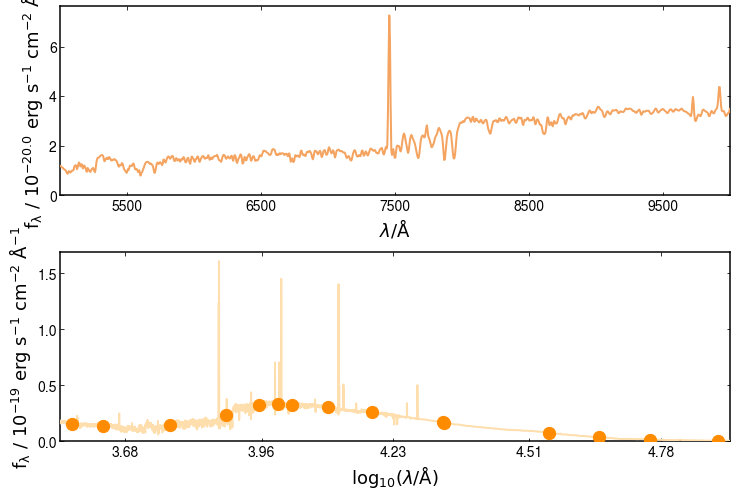

In [2]:

import bagpipes as pipes
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = False

exp = {}                          # Tau model star formation history component
exp["age"] = 3.                   # Gyr
exp["tau"] = 0.75                 # Gyr
exp["massformed"] = 9.            # log_10(M*/M_solar)
exp["metallicity"] = 0.5          # Z/Z_oldsolar

dust = {}                         # Dust component
dust["type"] = "Calzetti"         # Define the shape of the attenuation curve
dust["Av"] = 0.2                  # magnitudes

model_components = {}                   # The model components dictionary
model_components["redshift"] = 1.0      # Observed redshift  
model_components["exponential"] = exp   
model_components["dust"] = dust

goodss_filt_list = np.loadtxt("filters1/goodss_filt_list.txt", dtype="str") 


nebular = {}                      # Nebular emission component
nebular["logU"] = -3.             # log_10(ionization parameter)

dust["eta"] = 3.                  # Extra dust for young stars: multiplies Av

model_components["t_bc"] = 0.01         # Lifetime of birth clouds (Gyr)
model_components["veldisp"] = 200.      # km/s
model_components["nebular"] = nebular

model = pipes.model_galaxy(model_components, filt_list=goodss_filt_list, spec_wavs=np.arange(5000., 10000., 5.))

fig = model.plot()


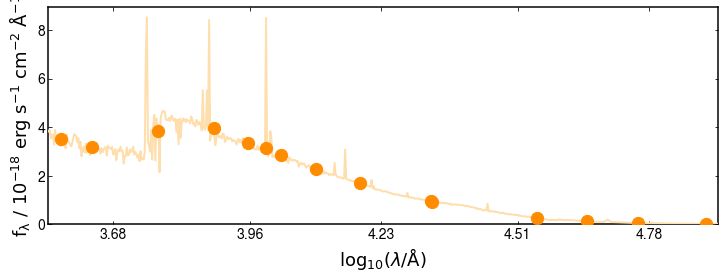

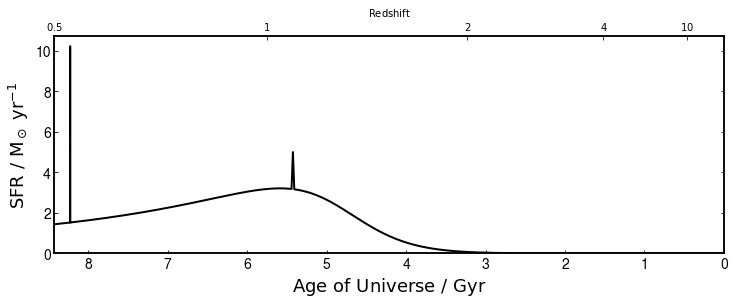

In [3]:

import bagpipes as pipes
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = False

#creates a dust dictionary 
dust = {}                         
dust["type"] = "Calzetti"         
dust["Av"] = 0.2                  
dust["eta"] = 3.                  

nebular = {}                      
nebular["logU"] = -3.             

dblplaw = {}
dblplaw["tau"] = 5.
dblplaw["alpha"] = 2.5
dblplaw["beta"] = 10.
dblplaw["massformed"] = 10.
dblplaw["metallicity"] = 0.5

burst1 = {}
burst1["age"] = 0.2
burst1["massformed"] = 7.
burst1["metallicity"] = 1.

burst2 = {}
burst2["age"] = 3.
burst2["massformed"] = 7.5
burst2["metallicity"] = 0.2

model_components = {}                   
model_components["redshift"] = 0.5
model_components["t_bc"] = 0.01         
model_components["veldisp"] = 200. 
model_components["burst1"] = burst1
model_components["burst2"] = burst2
model_components["dblplaw"] = dblplaw
model_components["dust"] = dust
model_components["nebular"] = nebular

model = pipes.model_galaxy(model_components, filt_list=goodss_filt_list)

fig = model.plot()
sfh = model.sfh.plot()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


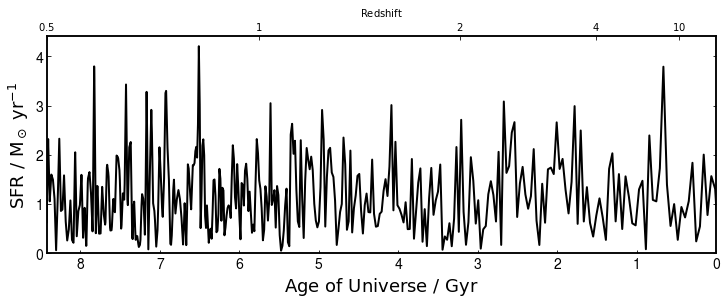

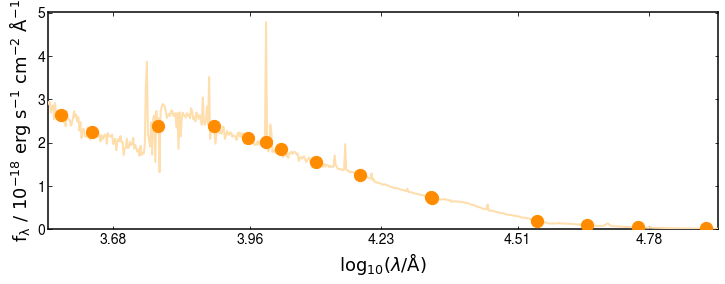

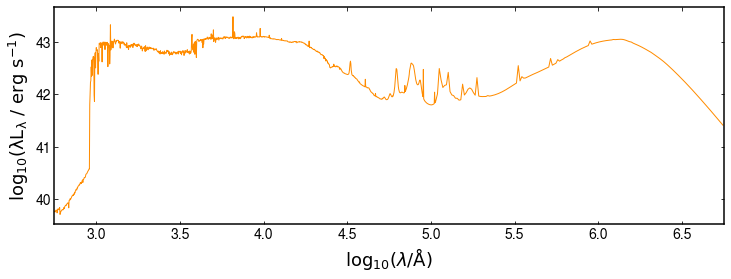

In [4]:
%load_ext autoreload #this and the line below allow the module like bagpipes to be updated even when in a code already
%autoreload 2
import bagpipes as pipes
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = False #disabling latex


dust = {}                         
dust["type"] = "Calzetti"         
dust["Av"] = 0.2                  
dust["eta"] = 3.                  

nebular = {}                      
nebular["logU"] = -3.             

sfh = np.zeros((500, 2)) #age in years, SFR in Msun/yr
sfh[:, 0] = np.arange(0., 10., 0.02)*10**9
sfh[:, 1] = np.abs(np.random.randn(500))

custom = {}
custom["history"] = sfh
custom["massformed"] = 10.
custom["metallicity"] = 1.

model_components = {}                   
model_components["redshift"] = 0.5
model_components["t_bc"] = 0.01         
model_components["veldisp"] = 200. 
model_components["custom"] = custom
model_components["dust"] = dust
model_components["nebular"] = nebular

model = pipes.model_galaxy(model_components, filt_list=goodss_filt_list)

sfh = model.sfh.plot()
fig = model.plot()


model.plot_full_spectrum()


